# Libraries

In [1]:
installed = False

while not installed:
    try:
        import time
        import os

        import numpy as np
        import pandas as pd

        import matplotlib.pyplot as plt
        import seaborn as sns

        import tensorflow as tf
        from tensorflow import keras

        from riotwatcher import LolWatcher, ApiError
        
        installed = True

    except ModuleNotFoundError:
        installed = False
        %pip install -U riotwatcher
        %pip install -q -U seaborn

# API & Account Settings

In [ ]:
os.environ["riotAPI"] = 'XXXXXXXXXXXXXXXXXXXXXXXXX' # change me

### API Key

In [ ]:
API_KEY = os.getenv('riotAPI')

### Account Settings

In [2]:
region = 'euw1' # change me
summoner_name = 'Amico Mio' # change me
n_games = 100

# Dataset from Riot API

In [ ]:
lol_watcher = LolWatcher(API_KEY)
my_region = region
me = lol_watcher.summoner.by_name(my_region, summoner_name)
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])

In [ ]:
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']
summoner_spells_version=versions['n']['summoner']
items_version=versions['n']['item']

current_champ_list = lol_watcher.data_dragon.champions(champions_version)
current_summoner_list = lol_watcher.data_dragon.summoner_spells(summoner_spells_version)

matches_ids = lol_watcher.match.matchlist_by_puuid(my_region, me['puuid'], count=n_games)

In [ ]:
games = {}

participants = []
for i in range(n_games):
    print(f"Fetching game {i} of {n_games}")
    try:
        last_match = matches_ids[i]

        match_detail = lol_watcher.match.by_id(my_region, last_match)

        champ_dict = {}
        for key in current_champ_list['data']: 
            row = current_champ_list['data'][key] 
            champ_dict[row['key']] = row['id']

        summoners_dict = {}
        for key in current_summoner_list['data']:
                row = current_summoner_list['data'][key]
                summoners_dict[row['key']] = row['id']

        for row in match_detail['info']['participants']:
            if match_detail['info']['gameMode'] == "CLASSIC" and match_detail['info']['gameType'] == "MATCHED_GAME":
                participants_row = {}
                participants_row['champion'] = champ_dict[str(row['championId'])]
                participants_row['Summoner_name'] = lol_watcher.summoner.by_id(my_region, row['summonerId']).get('name')
                participants_row['win'] = row['win']
                participants_row['assists'] = row['assists']
                participants_row['spell1'] = summoners_dict[str(row['summoner1Id'])]
                participants_row['spell2'] = summoners_dict[str(row['summoner2Id'])]
                participants_row['totalDamageDealt'] = row['totalDamageDealt']
                participants_row['goldEarned'] = row['goldEarned']
                participants_row['champLevel'] = row['champLevel']            
                participants_row['deaths'] = row['deaths']                    
                participants_row['firstBloodKill'] = row['firstBloodKill']      
                participants_row['firstTowerKill'] = row['firstTowerKill']           
                participants_row['individualPosition'] = row['individualPosition']
                participants_row['kills'] = row['kills']             
                participants_row['physicalDamageDealt'] = row['physicalDamageDealt']
                participants_row['magicDamageDealt'] = row['magicDamageDealt']      
                participants_row['trueDamageDealt'] = row['trueDamageDealt']   
                participants_row['wardsPlaced'] = row['wardsPlaced']     
                participants_row['matchId'] = match_detail['metadata']['matchId']
                participants_row['gameDuration'] = match_detail['info']['gameDuration']

                participants.append(participants_row)
        
        time.sleep(10)
                
    except ApiError as err:
         print(err)
         time.sleep(10)
         continue 

# CSV file

In [ ]:
df = pd.DataFrame(participants)
df['win'] = df['win'].astype(int)
df['firstBloodKill'] = df['firstBloodKill'].astype(int)
df['firstTowerKill'] = df['firstTowerKill'].astype(int)
df.to_csv(f'{summoner_name}.csv', index=False)

### Import local CSV's (uncomment)

In [3]:
#df1 = pd.read_csv(f"{summoner_name}.csv")
#df2 = pd.read_csv('example.csv')
#df = pd.concat([df1, df2])

### Filter by Summoner Name

In [4]:
summoner_df = df[df.Summoner_name == summoner_name]

In [5]:
summoner_df

,champion,Summoner_name,win,assists,spell1,spell2,totalDamageDealt,goldEarned,champLevel,deaths,firstBloodKill,firstTowerKill,individualPosition,kills,physicalDamageDealt,magicDamageDealt,trueDamageDealt,wardsPlaced,matchId,gameDuration
6,Sejuani,Amico Mio,0,13,SummonerSmite,SummonerFlash,264081,15645,17,8,0,0,JUNGLE,6,138319,68962,56798,3,EUW1_6327613399,2335
16,Belveth,Amico Mio,0,8,SummonerSmite,SummonerFlash,195341,11299,15,10,0,0,JUNGLE,5,139768,19657,35915,0,EUW1_6327572420,1826
29,Milio,Amico Mio,0,9,SummonerDot,SummonerFlash,44470,8010,14,3,0,0,UTILITY,1,8575,35319,576,12,EUW1_6327554551,1836
38,Sivir,Amico Mio,0,12,SummonerExhaust,SummonerFlash,218667,13666,15,12,1,0,BOTTOM,7,202578,2941,13147,9,EUW1_6327457873,2012
49,Taric,Amico Mio,1,29,SummonerDot,SummonerFlash,65509,12245,17,6,0,0,UTILITY,4,18594,39633,7281,24,EUW1_6327432991,2272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Kaisa,Amico Mio,0,10,SummonerExhaust,SummonerFlash,241225,17704,17,8,0,1,BOTTOM,14,190789,36348,14087,9,EUW1_6184208557,2357
950,Teemo,Amico Mio,0,14,SummonerDot,SummonerFlash,371585,21594,18,12,0,1,TOP,12,47015,318795,5774,7,EUW1_6184132869,2430
965,Gnar,Amico Mio,1,20,SummonerDot,SummonerFlash,234570,18389,18,8,1,0,TOP,10,209397,20069,5103,9,EUW1_6184053907,2197
976,Diana,Amico Mio,1,8,SummonerSmite,SummonerFlash,218804,13066,14,1,0,1,JUNGLE,12,32270,160002,26530,3,EUW1_6181138025,1245


# Feature variables and Target variable

In [6]:
X = summoner_df.drop(['champion', 'matchId', 'individualPosition', 'spell2', 'spell1', 'win', 'Summoner_name'], axis=1)
y = summoner_df.iloc[:, summoner_df.columns == 'win']['win']

### Shapes

In [7]:
print(X.shape)
print(y.shape)
print(y)

(185, 13)
(185,)
6      0
16     0
29     0
38     0
49     1
      ..
948    0
950    0
965    1
976    1
984    0
Name: win, Length: 185, dtype: int64


# Z-Score Normalization

In [8]:
mean=X.mean(axis=0)
std=X.std(axis=0)
X=(X-mean)/std

X.head()

,assists,totalDamageDealt,goldEarned,champLevel,deaths,firstBloodKill,firstTowerKill,kills,physicalDamageDealt,magicDamageDealt,trueDamageDealt,wardsPlaced,gameDuration
6,0.341815,0.564526,0.501050,0.723387,0.176764,-0.403284,-0.347213,-0.376373,0.173663,0.274547,1.114845,-0.468627,1.082044
16,-0.403890,-0.028233,-0.432647,0.026373,0.740582,-0.403284,-0.347213,-0.563548,0.187275,-0.526295,0.340746,-1.016181,-0.056666
29,-0.254749,-1.329227,-1.139257,-0.322133,-1.232779,-0.403284,-0.347213,-1.312247,-1.045153,-0.271903,-0.969214,1.174034,-0.034295
38,0.192674,0.172912,0.075880,0.026373,1.304399,2.466238,-0.347213,-0.189198,0.777313,-0.797806,-0.503227,0.626480,0.359444
49,2.728073,-1.147803,-0.229408,0.723387,-0.387053,-0.403284,-0.347213,-0.750723,-0.951034,-0.201833,-0.720670,3.364249,0.941104


# Pairplot for Win and Lose

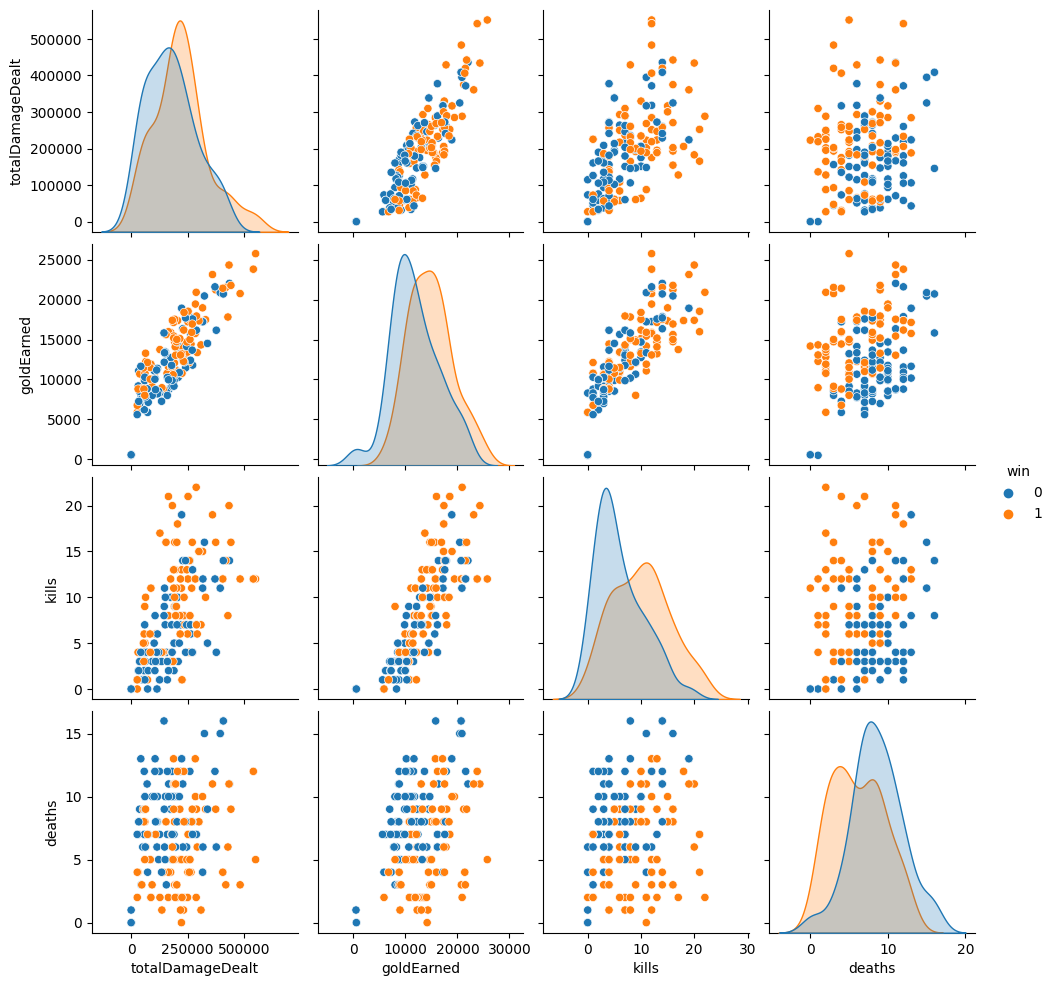

In [9]:
sns.pairplot(summoner_df[['totalDamageDealt', 'goldEarned', 'kills', 'deaths', 'win']], hue = 'win', diag_kind="kde")

# Correlation Plot

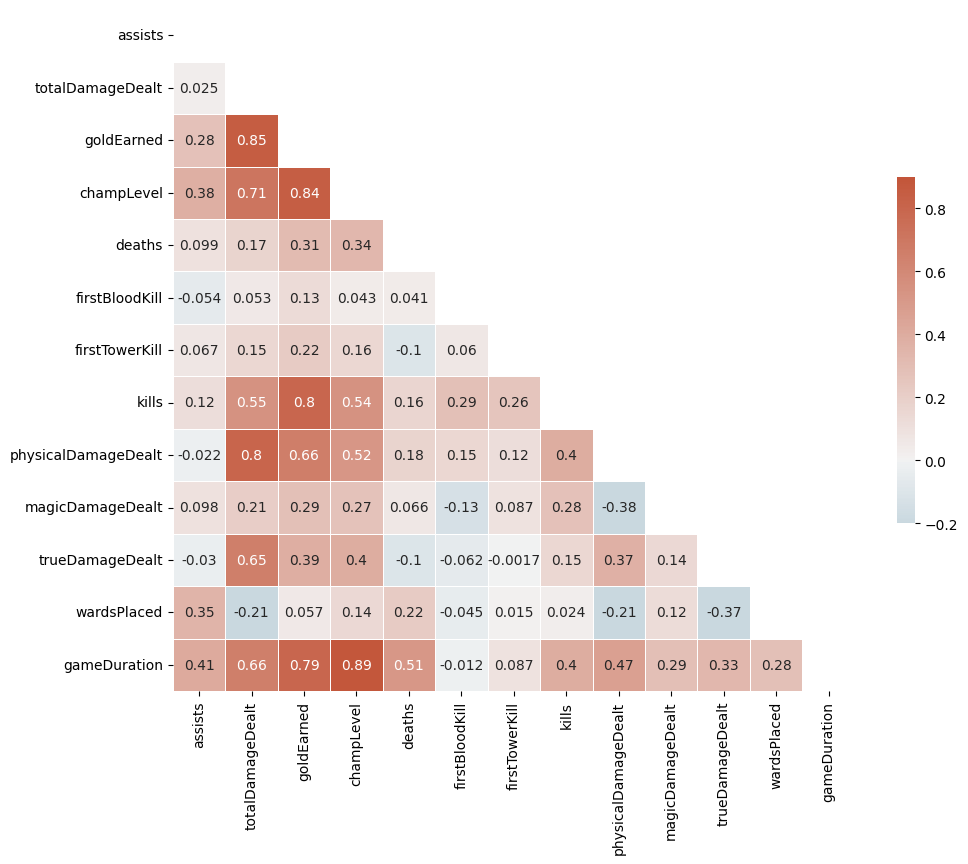

In [10]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0, vmin=-0.2, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

# NN Model

In [11]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,841
Trainable params: 67,841
Non-trainable params: 0
_________________________________________________________________


## Epochs and learning rate scheduler step

In [12]:
epochs = 200
step = int(epochs/5)
init_weights = model.get_weights()

Find a good learning rate value by running the model for 200 epochs and changing the learning rate by an order of magnitude. It will try all learning rates between 1e-8 and 1e-3

In [13]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / step))

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Train the model
history = model.fit(X, y, epochs=epochs, callbacks=[lr_schedule])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 0.7121 - lr: 1.0000e-08
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7121 - lr: 1.0593e-08
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7121 - lr: 1.1220e-08
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7121 - lr: 1.1885e-08
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7121 - lr: 1.2589e-08
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7121 - lr: 1.3335e-08
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7120 - lr: 1.4125e-08
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7120 - lr: 1.4962e-08
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7120 - lr: 1.5849e-08
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7120 - lr: 1.6788e-08
Epoch 11/200
6/6 [==============================]

### Loss ~ learning rate

(1e-08, 0.0009440608762859226, 0.0, 0.712073564529419)

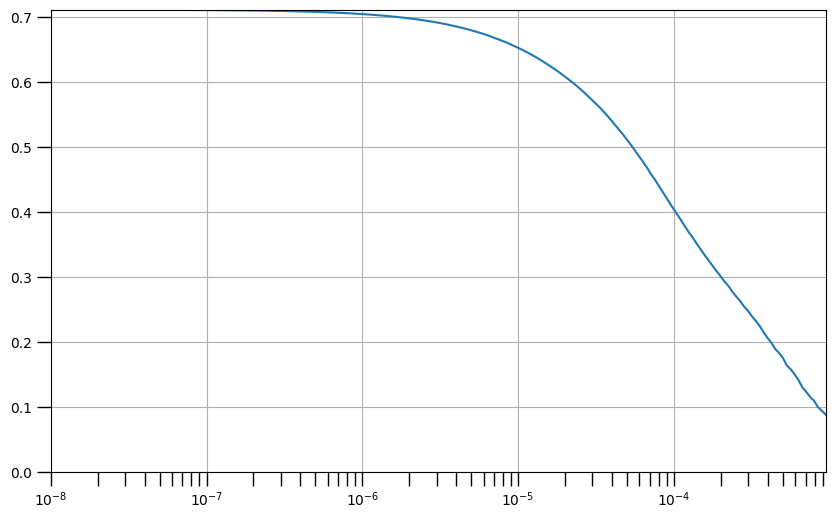

In [14]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(epochs) / step))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.axis([1e-8, max(lrs), 0, max(history.history["loss"])])

In [15]:
learning_rate = 1e-4 # good lr from graph

# Reset the weights
model.set_weights(init_weights)

## Compile model with learning rate found

In [16]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

model.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy'])

## Fit the model with a validation spli of 0.2 and few epochs in order to avoid overfitting

In [17]:
history = model.fit(X, y, epochs=30, validation_split=0.2) #early stopping to avoid overfitting -> few epochs 

Epoch 1/30
5/5 [==============================] - 1s 72ms/step - loss: 0.7082 - accuracy: 0.5000 - val_loss: 0.6738 - val_accuracy: 0.5676
Epoch 2/30
5/5 [==============================] - 0s 19ms/step - loss: 0.6767 - accuracy: 0.6081 - val_loss: 0.6509 - val_accuracy: 0.5946
Epoch 3/30
5/5 [==============================] - 0s 23ms/step - loss: 0.6475 - accuracy: 0.6824 - val_loss: 0.6309 - val_accuracy: 0.6486
Epoch 4/30
5/5 [==============================] - 0s 20ms/step - loss: 0.6256 - accuracy: 0.7770 - val_loss: 0.6119 - val_accuracy: 0.7027
Epoch 5/30
5/5 [==============================] - 0s 16ms/step - loss: 0.6036 - accuracy: 0.7770 - val_loss: 0.5955 - val_accuracy: 0.7297
Epoch 6/30
5/5 [==============================] - 0s 16ms/step - loss: 0.5866 - accuracy: 0.7905 - val_loss: 0.5804 - val_accuracy: 0.7838
Epoch 7/30
5/5 [==============================] - 0s 19ms/step - loss: 0.5688 - accuracy: 0.7905 - val_loss: 0.5673 - val_accuracy: 0.7838
Epoch 8/30
5/5 [===========

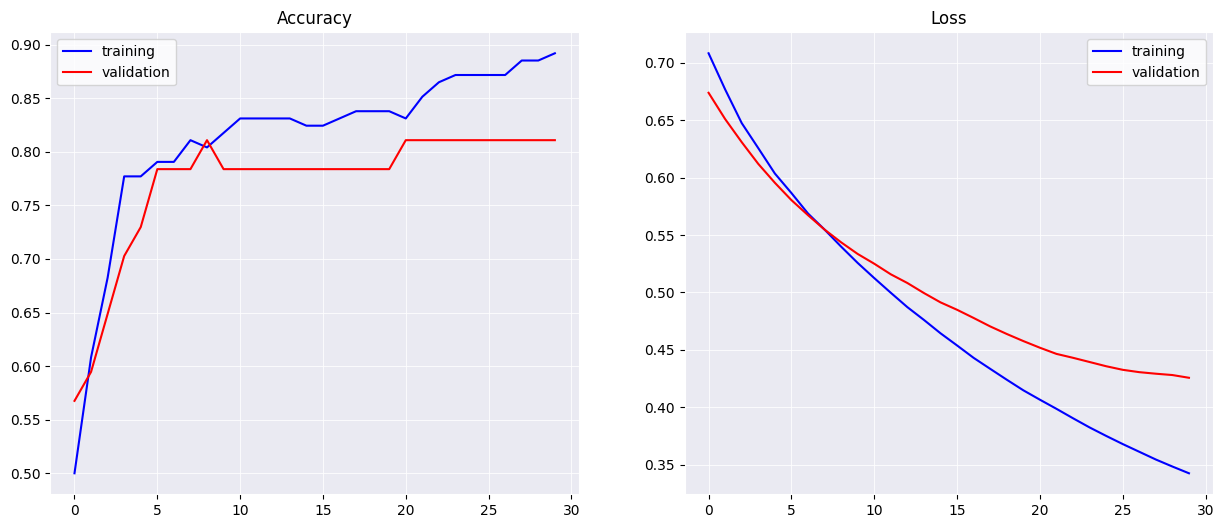

In [18]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()

# Accuracy (validation split)

This is the last value of validation accuracy

In [19]:
round(val_acc[-1],2)

0.81